## Read the dataset

In [55]:
import numpy as np
import pandas as pd

In [56]:
data = pd.read_csv("Insurance_Data_Training.csv")
data.head()

,CustomerID,Title,GivenName,MiddleInitial,Surname,CreditCardType,Occupation,Gender,Age,Location,MotorInsurance,MotorValue,MotorType,HealthInsurance,HealthType,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,TravelType,PrefChannel
0,1,Mrs.,Macy,A,Boyle,AMEX,Clinical laboratory technologist,female,23,Urban,No,NaN,NaN,No,NaN,NaN,NaN,Yes,Premium,SMS
1,2,Ms.,Thea,L,McIntosh,AMEX,NaN,female,44,Urban,No,NaN,NaN,Yes,Level1,2.0,3.0,No,NaN,Phone
2,4,Ms.,Murron,P,Miller,AMEX,Sheriff,female,19,Urban,Yes,4920.0,Bundle,No,NaN,NaN,NaN,No,NaN,SMS
3,5,Mr.,Kai,A,Henderson,Visa,Automotive painter,male,47,Rural,Yes,14994.0,Single,Yes,Level1,1.0,2.0,Yes,Business,Phone
4,11,Mrs.,Kayla,A,Brown,Visa,Risk manager,female,54,Rural,Yes,14605.0,Single,Yes,Level2,2.0,3.0,No,NaN,Email


## Data Cleaning

In [57]:
## Dropping unnecesary columns
data = data.drop(columns=['CustomerID','Title','GivenName','MiddleInitial','Surname'])
data.head()

,CreditCardType,Occupation,Gender,Age,Location,MotorInsurance,MotorValue,MotorType,HealthInsurance,HealthType,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,TravelType,PrefChannel
0,AMEX,Clinical laboratory technologist,female,23,Urban,No,NaN,NaN,No,NaN,NaN,NaN,Yes,Premium,SMS
1,AMEX,NaN,female,44,Urban,No,NaN,NaN,Yes,Level1,2.0,3.0,No,NaN,Phone
2,AMEX,Sheriff,female,19,Urban,Yes,4920.0,Bundle,No,NaN,NaN,NaN,No,NaN,SMS
3,Visa,Automotive painter,male,47,Rural,Yes,14994.0,Single,Yes,Level1,1.0,2.0,Yes,Business,Phone
4,Visa,Risk manager,female,54,Rural,Yes,14605.0,Single,Yes,Level2,2.0,3.0,No,NaN,Email


In [58]:
## Getting information about data types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4109 entries, 0 to 4108
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CreditCardType          3383 non-null   object 
 1   Occupation              2549 non-null   object 
 2   Gender                  4109 non-null   object 
 3   Age                     4109 non-null   int64  
 4   Location                4109 non-null   object 
 5   MotorInsurance          4109 non-null   object 
 6   MotorValue              3378 non-null   float64
 7   MotorType               3378 non-null   object 
 8   HealthInsurance         4109 non-null   object 
 9   HealthType              2555 non-null   object 
 10  HealthDependentsAdults  2555 non-null   float64
 11  HealthDependentsKids    2555 non-null   float64
 12  TravelInsurance         4109 non-null   object 
 13  TravelType              2120 non-null   object 
 14  PrefChannel             4109 non-null   

In [59]:
## Check the number of male and female
data['Gender'].value_counts()

female    2073
male      2013
f           14
m            9
Name: Gender, dtype: int64

In [60]:
## Encode manually the gender, m for male and f for female
data['Gender'] = data['Gender'].apply(lambda x:'male' if x=='m' else x)
data['Gender'] = data['Gender'].apply(lambda x:'female' if x=='f' else x)

In [61]:
## Check the number of credit card type
data['CreditCardType'].value_counts()

AMEX    1736
Visa    1647
Name: CreditCardType, dtype: int64

In [62]:
##Replace the null values of the CreditCardType column with "not_given".
import math
data['CreditCardType'] = data['CreditCardType'].apply(lambda x:'not_given' if type(x)==float and math.isnan(x) else x)

In [63]:
## Check the number of occupations
data['Occupation'].value_counts()

HIV/AIDS nurse                   6
Desktop publishing editor        5
Systems analyst                  5
Broker                           5
Poultry cutter                   5
                                ..
Arc cutter                       1
Training development director    1
Dietetic technician              1
Family services social worker    1
Blogger                          1
Name: Occupation, Length: 1595, dtype: int64

In [64]:
## Replace the null values of the Occupation column with "not_given".

import math
data['Occupation'] = data['Occupation'].apply(lambda x:'not_given' if type(x)==float and math.isnan(x) else x)

In [65]:
## Check the number of motor types
data['MotorType'].value_counts()

Single    2300
Bundle    1078
Name: MotorType, dtype: int64

In [66]:
## Replace the null values with single
data['MotorType'] = data['MotorType'].apply(lambda x:'Single' if type(x)==float and math.isnan(x) else x)

In [67]:
## Check the number of health types
data['HealthType'].value_counts()

Level2    1258
Level1     664
Level3     633
Name: HealthType, dtype: int64

In [68]:
## Replace the null values with Level2
data['HealthType'] = data['HealthType'].apply(lambda x:'Level2' if type(x)==float and math.isnan(x) else x)

In [69]:
## Check the number of travel types do we have
data['TravelType'].value_counts()

Business      674
Standard      479
Premium       445
Backpacker    337
Senior        185
Name: TravelType, dtype: int64

In [70]:
## Replace the null values by not_given
data['TravelType'] = data['TravelType'].apply(lambda x:'not_given' if type(x)==float and math.isnan(x) else x)

In [71]:
## Replace the null values by the average in the numerical data

data['MotorValue'] = data['MotorValue'].apply(lambda x:  np.mean(data['MotorValue']) if type(x)==float and math.isnan(x) else x)
data['HealthDependentsAdults'] = data['HealthDependentsAdults'].apply(lambda x:  np.mean(data['HealthDependentsAdults']) if type(x)==float and math.isnan(x) else x)
data['HealthDependentsKids'] = data['HealthDependentsKids'].apply(lambda x:  np.mean(data['HealthDependentsKids']) if type(x)==float and math.isnan(x) else x)

In [72]:
data['PrefChannel'].value_counts()

Email    1772
Phone    1564
SMS       760
P           6
E           5
S           2
Name: PrefChannel, dtype: int64

In [73]:
## Manual Encoding of the preferred channel
data['PrefChannel'] = data['PrefChannel'].apply(lambda x:'Email' if x=='E' else x)
data['PrefChannel'] = data['PrefChannel'].apply(lambda x:'Phone' if x=='P' else x)
data['PrefChannel'] = data['PrefChannel'].apply(lambda x:'SMS' if x=='S' else x)

In [74]:
## Save the cleaned data
data.to_csv('Insurance_cleaned.csv')

In [75]:
## Encoding of the categorical data

## Encode categorical variables to numbers
from sklearn.preprocessing import LabelEncoder
encoder_credit_card_type = LabelEncoder()
encoder_credit_card_type.fit(data['CreditCardType'])
data['CreditCardType'] = encoder_credit_card_type.transform(data['CreditCardType'])
encoder_occupation = LabelEncoder()
encoder_occupation.fit(data['Occupation'])
data['Occupation'] = encoder_occupation.transform(data['Occupation'])
encoder_gender = LabelEncoder()
encoder_gender.fit(data['Gender'])
data['Gender'] = encoder_gender.transform(data['Gender'])
encoder_location = LabelEncoder()
encoder_location.fit(data['Location'])
data['Location'] = encoder_location.transform(data['Location'])
encoder_motor_insurance = LabelEncoder()
encoder_motor_insurance.fit(data['MotorInsurance'])
data['MotorInsurance'] = encoder_motor_insurance.transform(data['MotorInsurance'])
encoder_health_insurance = LabelEncoder()
encoder_health_insurance.fit(data['HealthInsurance'])
data['HealthInsurance'] = encoder_health_insurance.transform(data['HealthInsurance'])
encoder_travel_insurance = LabelEncoder()
encoder_travel_insurance.fit(data['TravelInsurance'])
data['TravelInsurance'] = encoder_travel_insurance.transform(data['TravelInsurance'])
encoder_health_type = LabelEncoder()
encoder_health_type.fit(data['HealthType'])
data['HealthType'] = encoder_health_type.transform(data['HealthType'])
encoder_motor_type = LabelEncoder()
encoder_motor_type.fit(data['MotorType'])
data['MotorType'] = encoder_motor_type.transform(data['MotorType'])
encoder_travel_type = LabelEncoder()
encoder_travel_type.fit(data['TravelType'])
data['TravelType'] = encoder_travel_type.transform(data['TravelType'])
encoder_pref_channel = LabelEncoder()
encoder_pref_channel.fit(data['PrefChannel'])
data['PrefChannel'] = encoder_pref_channel.transform(data['PrefChannel'])

In [76]:
data

,CreditCardType,Occupation,Gender,Age,Location,MotorInsurance,MotorValue,MotorType,HealthInsurance,HealthType,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,TravelType,PrefChannel
0,0,259,0,23,1,0,23464.7164,1,0,1,0.816047,1.749119,1,2,2
1,0,1595,0,44,1,0,23464.7164,1,1,0,2.000000,3.000000,0,5,1
2,0,1351,0,19,1,1,4920.0000,0,0,1,0.816047,1.749119,0,5,2
3,1,119,1,47,0,1,14994.0000,1,1,0,1.000000,2.000000,1,1,1
4,1,1303,0,54,0,1,14605.0000,1,1,1,2.000000,3.000000,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4104,1,901,1,68,0,0,23464.7164,1,1,2,1.000000,0.000000,0,5,1
4105,1,934,0,45,1,1,36429.0000,1,0,1,0.816047,1.749119,0,5,0
4106,1,1055,1,48,0,1,14206.0000,1,1,1,0.000000,3.000000,0,5,0
4107,1,12,1,47,1,1,27251.0000,1,1,1,1.000000,2.000000,0,5,0


In [77]:
## Save the new dataset with encoded data
data.to_csv('Insurance_encoded.csv')

In [78]:
## Standardize data before clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [79]:
scaled_data

array([[-1.02751978, -1.57773655, -0.98430423, ...,  0.96861114,
        -0.76122178,  1.67104001],
       [-1.02751978,  0.93736301, -0.98430423, ..., -1.03240605,
         0.86730667,  0.33101202],
       [-1.02751978,  0.47801848, -0.98430423, ..., -1.03240605,
         0.86730667,  1.67104001],
       ...,
       [ 0.3348806 , -0.07921915,  1.01594606, ..., -1.03240605,
         0.86730667, -1.00901597],
       [ 0.3348806 , -2.04272876,  1.01594606, ..., -1.03240605,
         0.86730667, -1.00901597],
       [ 0.3348806 ,  0.42154169, -0.98430423, ..., -1.03240605,
         0.86730667, -1.00901597]])

In [80]:

scaled_data.shape

(4109, 15)

## Customer Segmentation

In [81]:
## Clustering with 4 cluster

from sklearn.cluster import KMeans
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(scaled_data)
k_means_labels = k_means.labels_
k_means_labels

array([0, 0, 3, ..., 1, 1, 1])

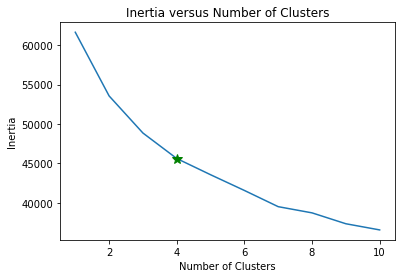

In [82]:
import matplotlib.pyplot as plt
# Finding the optimal number of clusters
def show_inertia_plot(df, marker_x=None, marker_y=None):
    clusters = [1,2,3,4,5,6,7,8,9,10]
    inertia_values = []

    for cluster in clusters:
        k_means = KMeans(n_clusters=cluster)

        k_means.fit(df)

        inertia_values.append(k_means.inertia_)

    plt.title('Inertia versus Number of Clusters')
    plt.plot(clusters, inertia_values)
    if marker_x and marker_y:
        plt.plot(marker_x, inertia_values[marker_y], 'g*', markersize=10)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

show_inertia_plot(scaled_data, 4, 3)

In [83]:
k_means.inertia_

45627.2424143584

In [84]:
## Length of labels (segmented customers)
len(k_means_labels)

4109

In [85]:
## Join the label of clusters with cleaned data 
data_cleaned = pd.read_csv('Insurance_cleaned.csv').drop(columns=['Unnamed: 0'])
data_cleaned['labels'] = k_means_labels
data_cleaned.head()

,CreditCardType,Occupation,Gender,Age,Location,MotorInsurance,MotorValue,MotorType,HealthInsurance,HealthType,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,TravelType,PrefChannel,labels
0,AMEX,Clinical laboratory technologist,female,23,Urban,No,23464.7164,Single,No,Level2,0.816047,1.749119,Yes,Premium,SMS,0
1,AMEX,not_given,female,44,Urban,No,23464.7164,Single,Yes,Level1,2.000000,3.000000,No,not_given,Phone,0
2,AMEX,Sheriff,female,19,Urban,Yes,4920.0000,Bundle,No,Level2,0.816047,1.749119,No,not_given,SMS,3
3,Visa,Automotive painter,male,47,Rural,Yes,14994.0000,Single,Yes,Level1,1.000000,2.000000,Yes,Business,Phone,2
4,Visa,Risk manager,female,54,Rural,Yes,14605.0000,Single,Yes,Level2,2.000000,3.000000,No,not_given,Email,1


In [86]:
data_cleaned.to_csv('Insurance_customer_segmentation.csv')

## Findings

In [87]:
# Print out the average values of segmented customers
data_cleaned.groupby('labels').mean()

,Age,MotorValue,HealthDependentsAdults,HealthDependentsKids
labels,,,,
0,39.674419,23464.716400,0.770253,1.584094
1,48.825386,22905.550491,0.906916,2.072919
2,50.897016,29842.438884,0.837709,1.794785
3,20.412924,17080.178532,0.686134,1.323542


## Research for potential customer segment eligible

In [88]:
df1=pd.DataFrame(data_cleaned.groupby('labels').HealthInsurance.value_counts())
df1['Percentage']=pd.DataFrame(data_cleaned.groupby('labels').HealthInsurance.value_counts().rename("Percentage").transform(lambda x: x/x.sum())*100)
df1

HealthInsurance  Percentage
labels HealthInsurance                             
0      Yes                          416   10.124118
       No                           315    7.666099
1      Yes                         1123   27.330251
       No                           303    7.374057
2      Yes                          791   19.250426
       No                           248    6.035532
3      No                           688   16.743733
       Yes                          225    5.475785

In [89]:
df2=pd.DataFrame(data_cleaned.groupby('labels').MotorInsurance.value_counts())
df2['Percentage']=pd.DataFrame(data_cleaned.groupby('labels').MotorInsurance.value_counts().rename("Percentage").transform(lambda x: x/x.sum())*100)
df2

,,MotorInsurance,Percentage
labels,MotorInsurance,,
0,No,731,17.790217
1,Yes,1426,34.704308
2,Yes,1039,25.285958
3,Yes,913,22.219518


In [90]:
df3=pd.DataFrame(data_cleaned.groupby('labels').TravelInsurance.value_counts())
df3['Percentage']=pd.DataFrame(data_cleaned.groupby('labels').TravelInsurance.value_counts().rename("Percentage").transform(lambda x: x/x.sum())*100)
df3

TravelInsurance  Percentage
labels TravelInsurance                             
0      Yes                          401    9.759065
       No                           330    8.031151
1      No                          1404   34.168898
       Yes                           22    0.535410
2      Yes                         1037   25.237284
       No                             2    0.048674
3      Yes                          660   16.062302
       No                           253    6.157216

In [91]:
df4=pd.DataFrame(data_cleaned.groupby('labels').PrefChannel.value_counts())
df4['Percentage']=pd.DataFrame(data_cleaned.groupby('labels').PrefChannel.value_counts().rename("Percentage").transform(lambda x: x/x.sum())*100)
df4

PrefChannel  Percentage
labels PrefChannel                         
0      Phone                274    6.668289
       Email                267    6.497931
       SMS                  190    4.623996
1      Phone                774   18.836700
       Email                535   13.020200
       SMS                  117    2.847408
2      Email                511   12.436116
       Phone                446   10.854222
       SMS                   82    1.995619
3      Email                464   11.292285
       SMS                  373    9.077634
       Phone                 76    1.849598

In [92]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(scaled_data,data_cleaned['labels'])
print("The accuracy of KNN Model is ",round(model.score(scaled_data,data_cleaned['labels'])*100,2))

The accuracy of KNN Model is  99.29


### Validation of the model with KNN Neighbor Algorithm

In [93]:
X = scaled_data
y = np.array(data_cleaned['labels']) 

In [94]:
X

array([[-1.02751978, -1.57773655, -0.98430423, ...,  0.96861114,
        -0.76122178,  1.67104001],
       [-1.02751978,  0.93736301, -0.98430423, ..., -1.03240605,
         0.86730667,  0.33101202],
       [-1.02751978,  0.47801848, -0.98430423, ..., -1.03240605,
         0.86730667,  1.67104001],
       ...,
       [ 0.3348806 , -0.07921915,  1.01594606, ..., -1.03240605,
         0.86730667, -1.00901597],
       [ 0.3348806 , -2.04272876,  1.01594606, ..., -1.03240605,
         0.86730667, -1.00901597],
       [ 0.3348806 ,  0.42154169, -0.98430423, ..., -1.03240605,
         0.86730667, -1.00901597]])

In [95]:
y

array([0, 0, 3, ..., 1, 1, 1])

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 100)

### Creating the training and test set

In [97]:
from sklearn.neighbors import KNeighborsClassifier
# instantiate learning model with k=3
model2=knn = KNeighborsClassifier(n_neighbors = 9)
# fitting model
model2=knn.fit(X_train,y_train)
#predict
pred = model2.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score
print("The Accuracy score is:{}".format(accuracy_score(y_test,pred)))

The Accuracy score is:0.9815175097276264


In [99]:
### Code from the blog https://deveshpoojari.medium.com/k-nearest-neighbors-and-its-optimization-2e3f6797af04
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# Creating odd list K for KNN
neighbors = list(range(1,15,2))
# empty list that will hold cv scores
cv_scores = [ ]
#perform 10-fold cross-validation
for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train,cv = 10,scoring ="accuracy")
    cv_scores.append(scores.mean())
cv_scores

[0.976629680998613,
 0.9831252889505316,
 0.9837714874122641,
 0.9840961627369393,
 0.9857205900895222,
 0.9850691379817593,
 0.9831231874921194]

In [100]:
###Code from the blog https://deveshpoojari.medium.com/k-nearest-neighbors-and-its-optimization-2e3f6797af04

# Changing to mis classification error
mse = [1-x for x in cv_scores]
# determing best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal no. of neighbors is {}".format(optimal_k))

The optimal no. of neighbors is 9


The optimal number of neighbors is 9


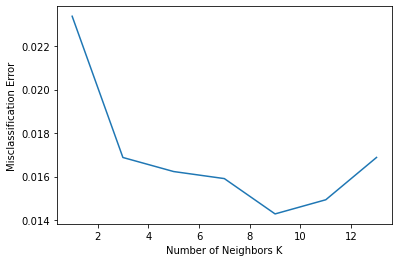

In [101]:
### Code from the blog https://deveshpoojari.medium.com/k-nearest-neighbors-and-its-optimization-2e3f6797af04


# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()


In [102]:
## Save the model
import pickle
# save the classifier
with open('customer_segmentation2.pkl', 'wb') as fid:
    pickle.dump(model2, fid)    

In [104]:
# Loading model to compare the results
model2= pickle.load(open('customer_segmentation2.pkl','rb'))
model2

KNeighborsClassifier(n_neighbors=9)